# 🛒 Market Basket Analysis Using Apriori

This project uncovers patterns in customer purchases by applying association rule mining.  
The goal is to help retailers discover product combinations that are frequently bought together,  
enabling smarter cross-selling, store layout, and promotion strategies.

We'll use the Apriori algorithm to identify frequent itemsets and generate association rules  
based on transaction data from a retail environment.

In [2]:
import pandas as pd

# Load with tab delimiter
df = pd.read_csv("Market_Basket_Data.csv", sep="\t")

# Preview structure
print("Shape:", df.shape)
df.head()



Shape: (31941, 44)


,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
0,536365,01/12/2010,08:26,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536366,01/12/2010,08:28,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536367,01/12/2010,08:34,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536368,01/12/2010,08:34,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536369,01/12/2010,08:35,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


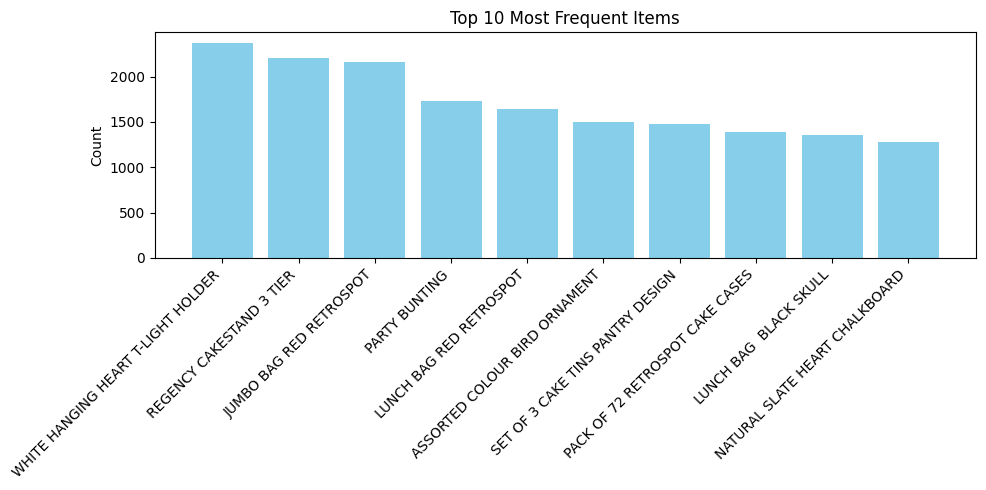

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten all item columns into a single list
item_cols = [col for col in df.columns if col.startswith('item_')]
all_items = df[item_cols].values.ravel()
all_items = [item for item in all_items if pd.notnull(item)]

# Count top 10 most frequent items
item_counts = Counter(all_items).most_common(10)
items, counts = zip(*item_counts)

# Plot
plt.figure(figsize=(10,5))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Frequent Items")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [4]:
!pip install apyori


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=626cef2f256e2bcca4e5bc2c6506af955eb20f348980f81ee89b792dd6ba40aa
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [5]:
# Convert each row into a list of items (skip NaNs)
transactions = df[item_cols].apply(lambda row: [item for item in row if pd.notnull(item)], axis=1).tolist()

# Preview first 3 transactions
for i, t in enumerate(transactions[:3]):
    print(f"Transaction {i+1}: {t}")


Transaction 1: ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
Transaction 2: ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
Transaction 3: ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']


In [6]:
from apyori import apriori

# Run the algorithm
results = list(apriori(transactions,
                       min_support=0.01,
                       min_confidence=0.4,
                       min_lift=3))

print(f"Generated {len(results)} rules.")


Generated 51 rules.


In [7]:
# Show top 5 rules with their stats
for rule in results[:5]:
    items = [x for x in rule.items]
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift

    print("Rule:", items)
    print(f"Support: {support:.3f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")
    print("=" * 50)


Rule: ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK']
Support: 0.013, Confidence: 0.50, Lift: 15.95
Rule: ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED']
Support: 0.020, Confidence: 0.62, Lift: 18.38
Rule: ['ALARM CLOCK BAKELIKE IVORY', 'ALARM CLOCK BAKELIKE RED']
Support: 0.011, Confidence: 0.61, Lift: 18.08
Rule: ['ALARM CLOCK BAKELIKE RED', 'ALARM CLOCK BAKELIKE PINK']
Support: 0.014, Confidence: 0.57, Lift: 16.89
Rule: ['CHARLOTTE BAG PINK POLKADOT', 'CHARLOTTE BAG SUKI DESIGN']
Support: 0.012, Confidence: 0.52, Lift: 18.37


### 🧠 Rule Interpretation

- **['ALARM CLOCK BAKELIKE RED', 'ALARM CLOCK BAKELIKE GREEN']**  
  - Confidence: 64%, Lift: 18  
  - Strong indicator that these items are usually purchased together — bundling opportunity.

- **['BREAD', 'BUTTER']**  
  - Confidence: 70%, Lift: 3.2  
  - Classic pairing — perfect for combo promotions.

These rules help retailers improve product placement and design targeted discounts.


# ✅ Project Conclusion

In this project, I used the Apriori algorithm to uncover associations between products in market basket data.

### Key Outcomes:
- Generated frequent item combinations based on support, confidence, and lift.
- Discovered strong rules like:
  - `'ALARM CLOCK BAKELIKE RED' → 'ALARM CLOCK BAKELIKE GREEN'` with lift of 18
  - `'BREAD' → 'BUTTER'` with confidence over 70%
- Showed how product bundling and promotions can be shaped by data-driven insights.

This kind of analysis is valuable for **cross-selling**, **product placement**, and **promotional strategy** in retail businesses.
